## Importing necessary library

In [1]:
import pandas as pd
import  numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

## Reading Concrete Data

In [76]:
df = pd.read_csv('Housing.csv') # Concrete_Data Housing Student_Marks
ref = df[:3]
newformat = {}
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


## Box plot, Density graph

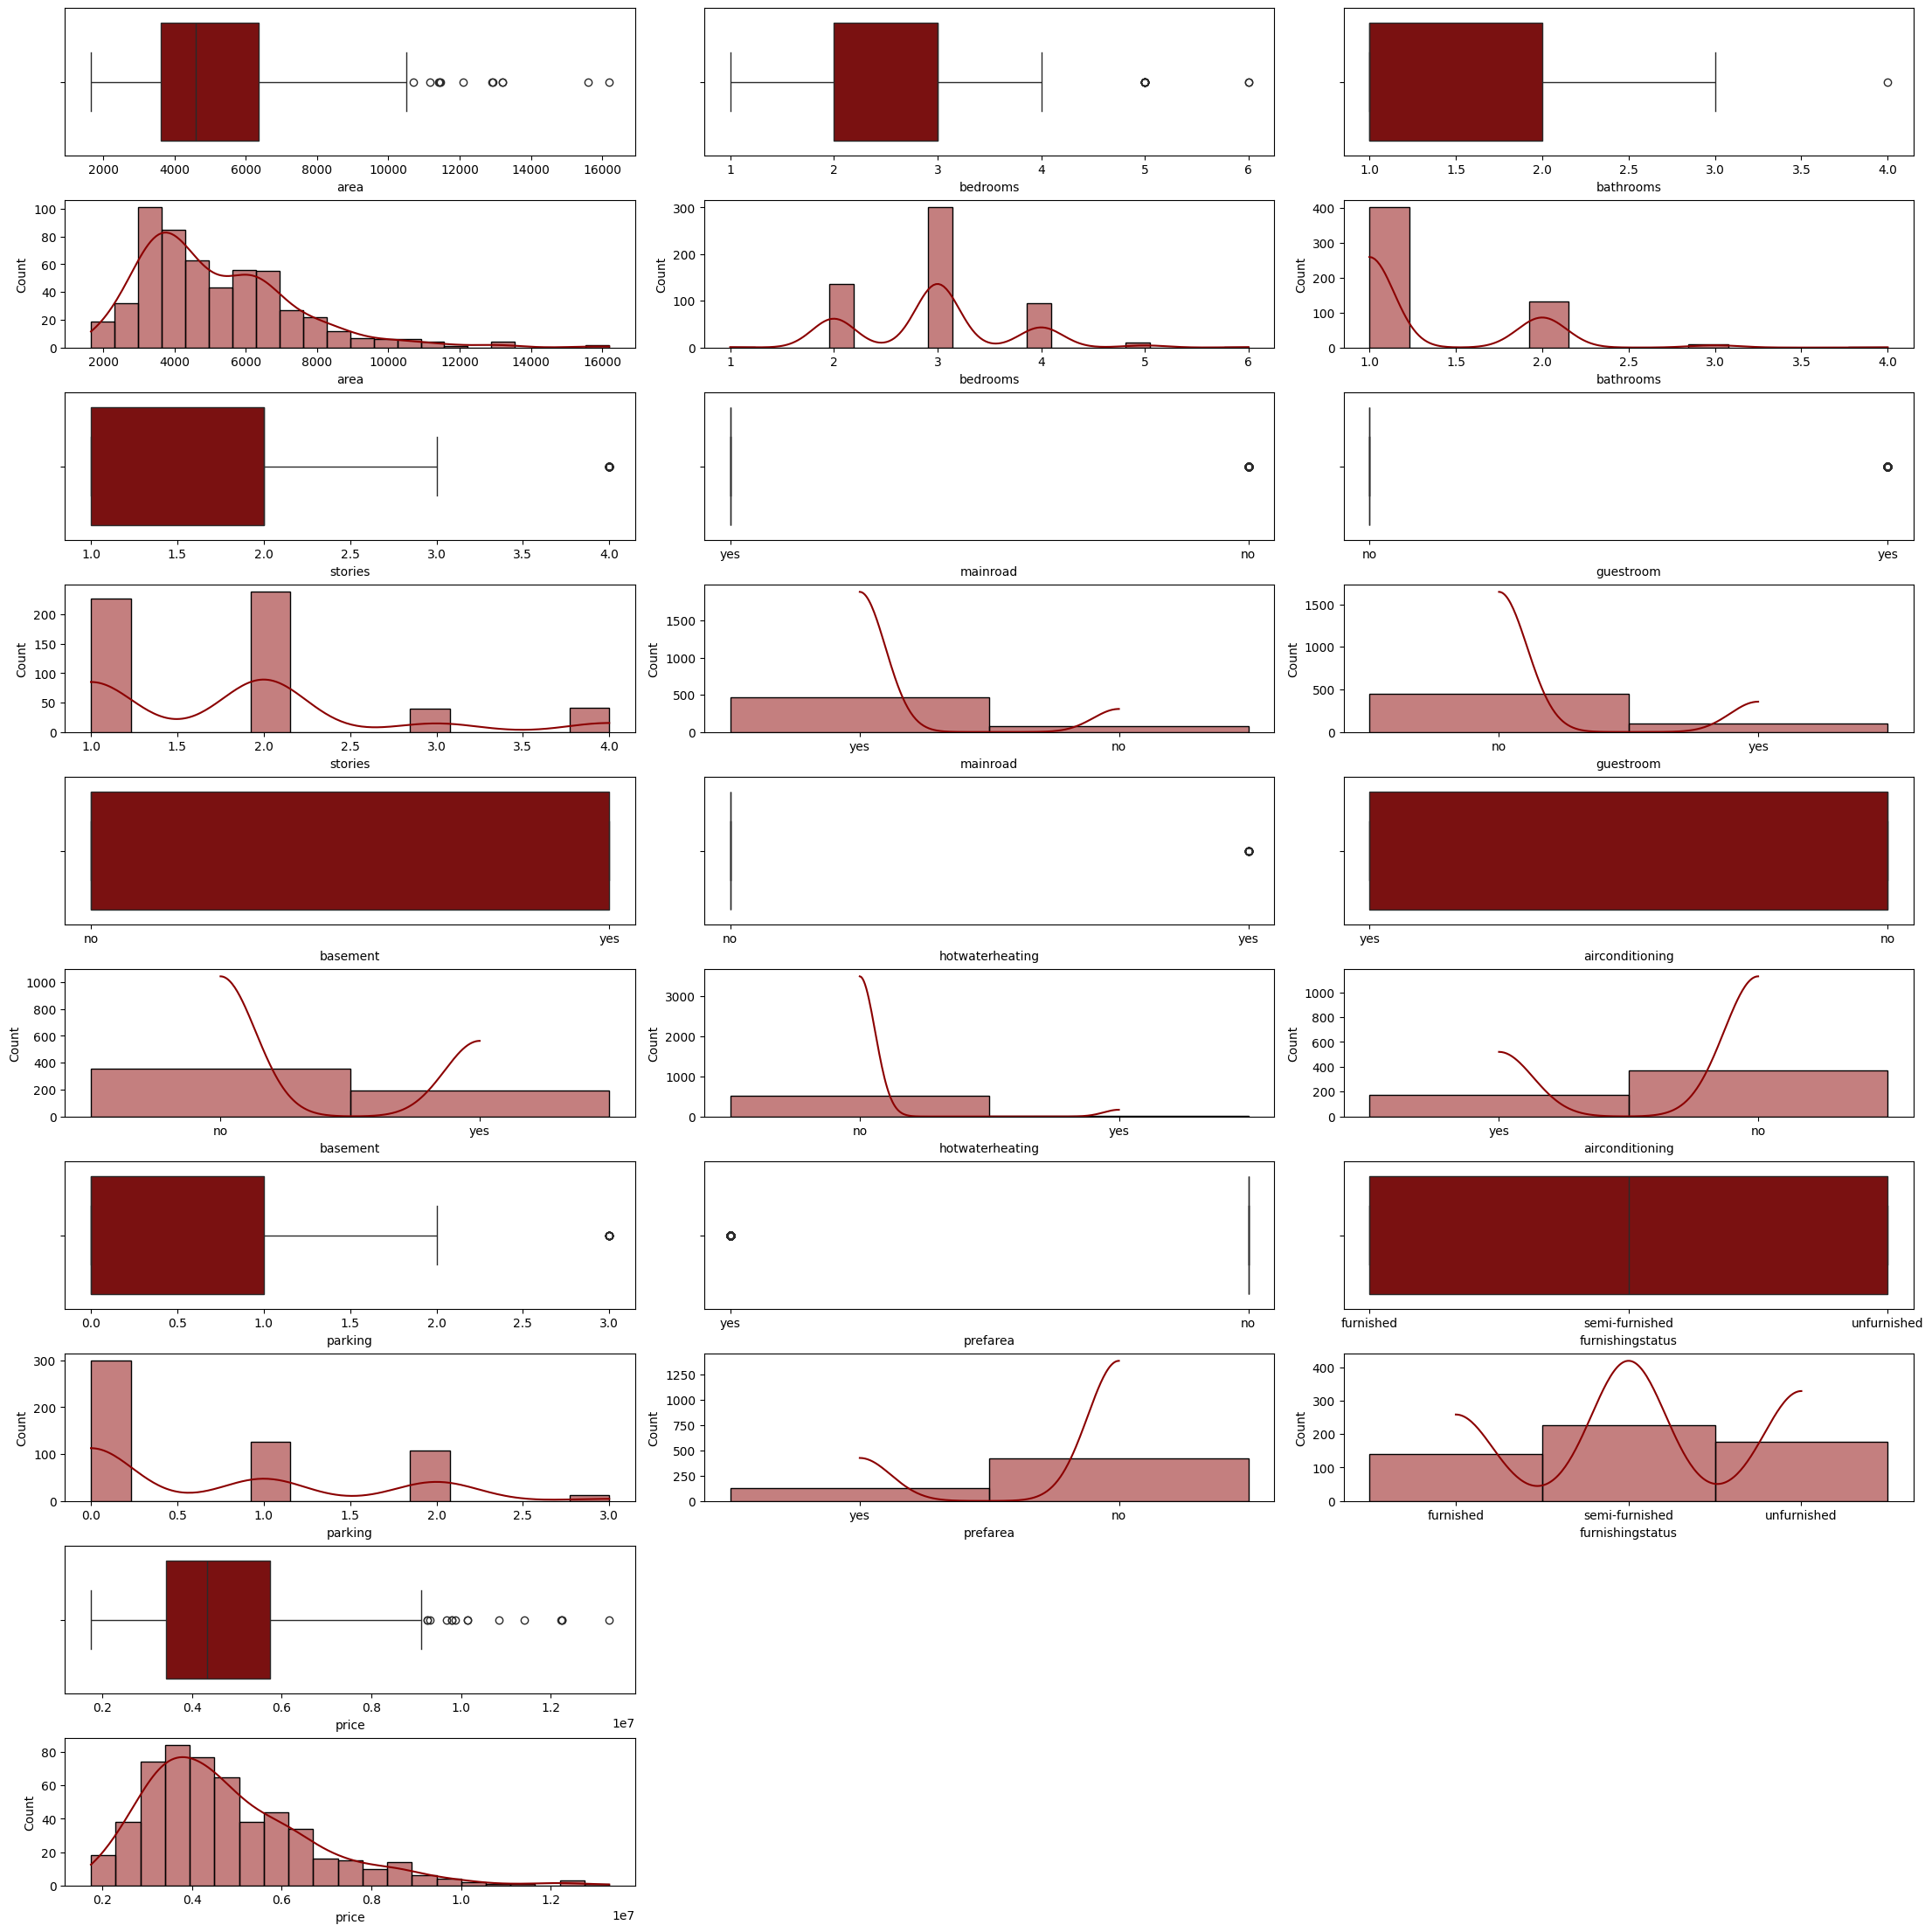

In [77]:
from math import ceil

fig = plt.figure(figsize=(22, 22), layout='constrained')
drawbox, indexbox = 1, 0
drawhist, indexhist = 4, 0
n = len(df.columns)
rows = (ceil(df.shape[1]/3))*2

while(indexbox < n):
    for i in range(3):
        if(indexbox < n):
            fig.add_subplot(rows, 3, drawbox)
            sns.boxplot(x=df.iloc[:, indexbox], color='darkred')
        drawbox += 1
        indexbox += 1
    drawhist = drawbox
    
    for i in range(3):
        if(indexhist < n):
            fig.add_subplot(rows, 3, drawhist)
            sns.histplot(x=df.iloc[:,indexhist], kde=True, color='darkred')
        drawhist += 1
        indexhist += 1
    drawbox = drawhist


## Converting string values into int

In [78]:
def value_map(x, valuemap):
    for key, value in valuemap.items():
        if(x == key):
            return value

for col in df:
    values = df[col].unique()
    if(type(values[0]) == str):
        valuemap = {}
        for num, val in enumerate(values):
            valuemap[val] = num
        print(f"String value found in {col}, converting it into: ")
        print(valuemap, "\n")
        newformat[col] = valuemap
        
        df[col] = df[col].apply(value_map, valuemap = valuemap)

String value found in mainroad, converting it into: 
{'yes': 0, 'no': 1} 

String value found in guestroom, converting it into: 
{'no': 0, 'yes': 1} 

String value found in basement, converting it into: 
{'no': 0, 'yes': 1} 

String value found in hotwaterheating, converting it into: 
{'no': 0, 'yes': 1} 

String value found in airconditioning, converting it into: 
{'yes': 0, 'no': 1} 

String value found in prefarea, converting it into: 
{'yes': 0, 'no': 1} 

String value found in furnishingstatus, converting it into: 
{'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2} 



<Axes: >

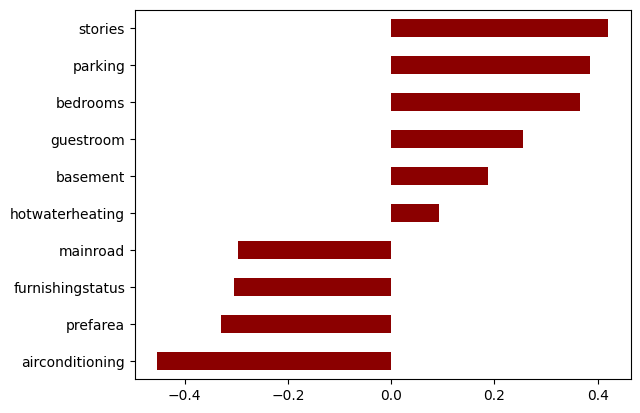

In [79]:
df.corr()[df.columns[-1]].sort_values().head(11)[:-1].plot.barh(color='darkred')

<Axes: >

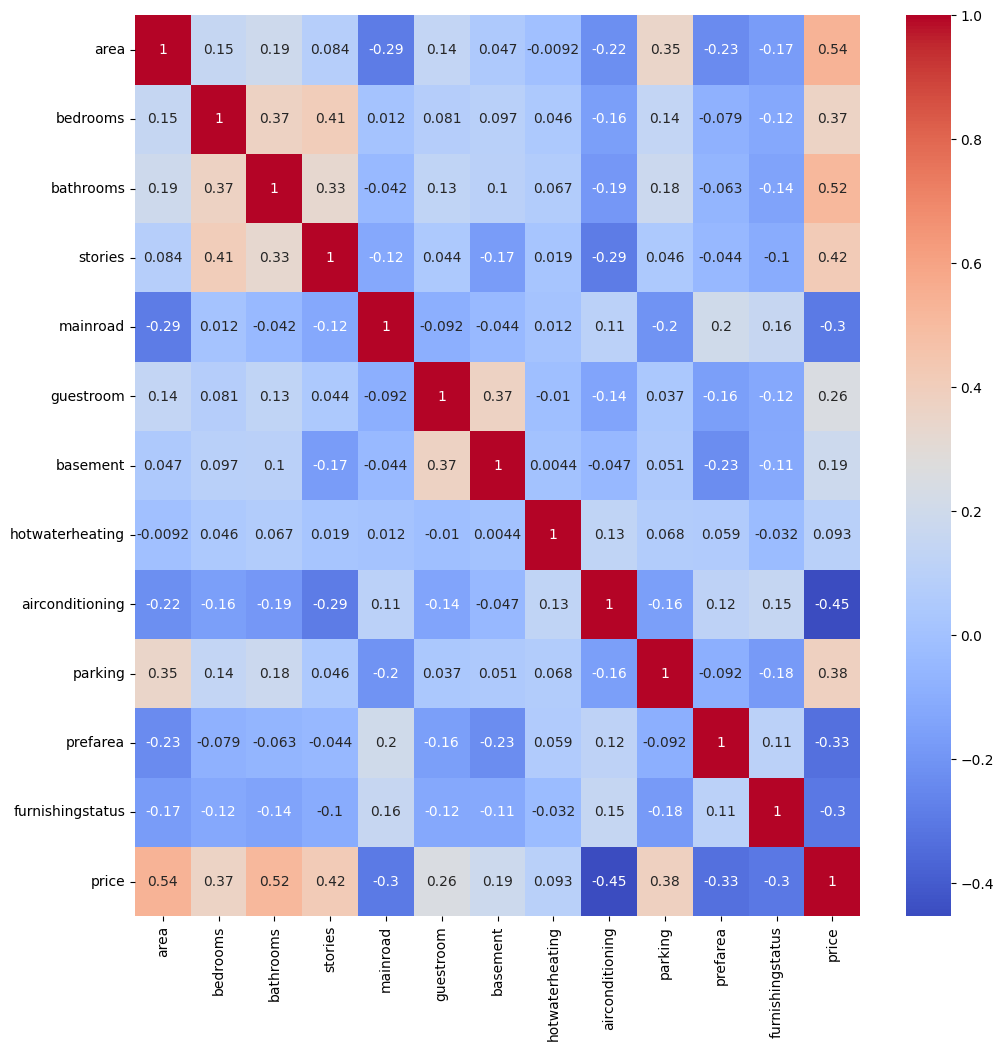

In [80]:
size = df.shape[1]*0.9
fig, ax = plt.subplots(figsize=(size, size))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

## Spliting into train and test data

In [81]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X train size:", X_train.shape)
print("y train size:", y_train.shape)

print("X test size:", X_test.shape)
print("y test size:", y_test.shape)

X train size: (436, 12)
y train size: (436,)
X test size: (109, 12)
y test size: (109,)


## Evaluating models

In [82]:
def eval_metrices(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MSE:", mse)
    print("SCORE:", score)
    return rmse, mae, mse, score

def crossvalidation(model_name, X_train, y_train, cv=None):
    cv_score = cross_val_score(estimator=model_name, X = X_train, y = y_train, cv=cv)
    return print("Cross Val score:", cv_score.mean())

In [83]:
model_accuracy = {}

In [84]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridge_model = Ridge(True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
model_accuracy["Ridge Regression"] = eval_metrices(y_test, y_pred)[-1]
crossvalidation(ridge_model, X_train, y_train, 3)

RMSE: 1265654.3147319916
MAE: 897112.5642130569
MSE: 1601880844399.7075
SCORE: 0.6185267294240362
Cross Val score: 0.6648599375702703


In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
model_accuracy["Linear Regression"] = eval_metrices(y_test, y_pred)[-1]
crossvalidation(lm, X_train, y_train, 3)

RMSE: 1266007.0072033568
MAE: 898629.2950371039
MSE: 1602773742288.0005
SCORE: 0.6183140939593397
Cross Val score: 0.6646597662179107


In [86]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
model_accuracy["XGBoost Regression"] = eval_metrices(y_test, y_pred)[-1]
crossvalidation(xgb, X_train, y_train, 3)

RMSE: 1351195.4426881184
MAE: 984164.9071100918
MSE: 1825729124341.1404
SCORE: 0.5652193091120952
Cross Val score: 0.5342312955104481


In [87]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
model_accuracy["Random Forest Regression"] = eval_metrices(y_test, y_pred)[-1]
crossvalidation(rf_reg, X_train, y_train, 3)

RMSE: 1222824.1256100973
MAE: 909121.104587156
MSE: 1495298842174.099
SCORE: 0.6439082583409226
Cross Val score: 0.5755025398198261


## Accuracy comparison

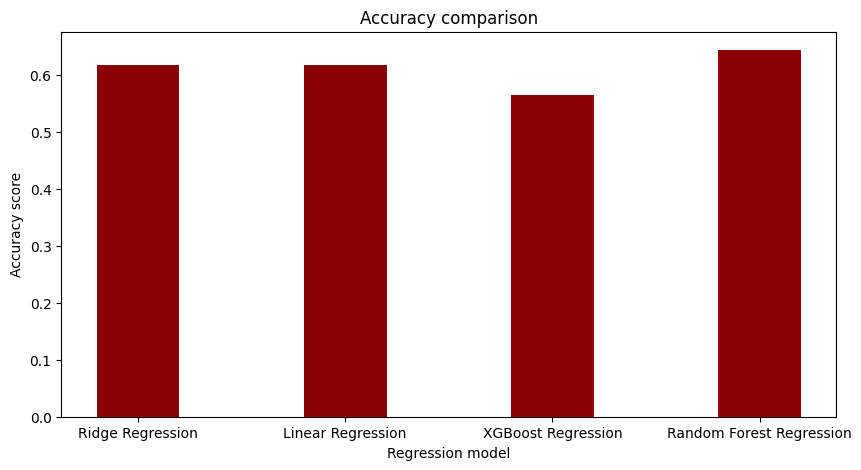

Best performing model: Random Forest Regression 0.6439082583409226


In [88]:
fig = plt.figure(figsize = (10, 5))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color = 'darkred', width = 0.4)
plt.xlabel("Regression model")
plt.ylabel("Accuracy score")
plt.title("Accuracy comparison")
plt.show()
bestmodel = ""
bestaccuracy = 0
for key, val in model_accuracy.items():
    if(val > bestaccuracy):
        bestaccuracy = val
        bestmodel = key
print("Best performing model:", bestmodel, bestaccuracy)

## Try entering your own data

In [89]:
print("Referance data")
print("Replace values as: ")
print(newformat)
ref

Referance data
Replace values as: 
{'mainroad': {'yes': 0, 'no': 1}, 'guestroom': {'no': 0, 'yes': 1}, 'basement': {'no': 0, 'yes': 1}, 'hotwaterheating': {'no': 0, 'yes': 1}, 'airconditioning': {'yes': 0, 'no': 1}, 'prefarea': {'yes': 0, 'no': 1}, 'furnishingstatus': {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}}


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000


In [90]:
data = [[]]
for attri in X_train:
    values = None
    if(attri in newformat):
        values = newformat[attri]
        
    entereddata = input(f"Enter data for {attri}:")
    if(values and entereddata in values):
        entereddata = values[entereddata]
    data[0].append(float(entereddata))
    
data = pd.DataFrame(data, columns=X_train.columns)

Enter data for area: 7420
Enter data for bedrooms: 4
Enter data for bathrooms: 2
Enter data for stories: 3
Enter data for mainroad: yes
Enter data for guestroom: no
Enter data for basement: no
Enter data for hotwaterheating: no
Enter data for airconditioning: yes
Enter data for parking: 2
Enter data for prefarea: yes
Enter data for furnishingstatus: furnished


In [91]:
print(df.columns[-1], ":", rf_reg.predict(data)[0])

price : 8190386.4


## Ignoring unimportant feature

In [92]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_}, index=X_train.columns)
feature = importance.sort_values(by="importance", ascending=False)
feature

,importance
area,0.417470
bathrooms,0.213400
stories,0.065585
parking,0.059748
furnishingstatus,0.055978
airconditioning,0.036928
basement,0.035100
bedrooms,0.035015
prefarea,0.029757
hotwaterheating,0.020940


In [93]:
i = 0
while i < len(feature):
    if(feature.values[i] < 0.05):
        temp = feature.drop(feature.index[i])
        feature = temp
    else:
        i += 1
feature

,importance
area,0.417470
bathrooms,0.213400
stories,0.065585
parking,0.059748
furnishingstatus,0.055978


In [94]:
X = df[feature.index]
y = df[df.columns[-1]]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train size:", X_train.shape)
print("y train size:", y_train.shape)

print("X test size:", X_test.shape)
print("y test size:", y_test.shape)

X train size: (436, 5)
y train size: (436,)
X test size: (109, 5)
y test size: (109,)


In [96]:
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
eval_metrices(y_test, y_pred)
crossvalidation(rf_reg, X_train, y_train, 3)

RMSE: 1564492.7857052553
MAE: 1130310.7339449541
MSE: 2447637676523.79
SCORE: 0.515757511078897
Cross Val score: 0.47492451485502835


In [97]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
eval_metrices(y_test, y_pred)
crossvalidation(xgb, X_train, y_train, 3)

RMSE: 1525233.0360497127
MAE: 1149538.0779816513
MSE: 2326335814257.4243
SCORE: 0.5397559632428028
Cross Val score: 0.3334509691423815
